In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The diffusion equation for a 1D case has a second-order derivative, as it can be seen:

$$
\dfrac{\partial u}{\partial t} = \nu \dfrac{\partial^2 u}{\partial x^2}
$$

Using the Taylor series expansion to discretize the second-order derivative with a Central Difference scheme, the terms around $u_i$ are:

* $ u_{i+1} = u_i + \Delta x \dfrac{\partial u}{\partial x} \bigg|_i + \dfrac{\Delta x^2}{2!}\dfrac{\partial^2 u}{\partial x^2}\bigg|_i + \dfrac{\Delta x^3}{3!} \dfrac{\partial^3 u}{\partial x^3} \bigg|_i + \mathcal{O}(\Delta x^4)$


* $ u_{i-1} = u_i - \Delta x \dfrac{\partial u}{\partial x} \bigg|_i + \dfrac{\Delta x^2}{2!}\dfrac{\partial^2 u}{\partial x^2}\bigg|_i - \dfrac{\Delta x^3}{3!} \dfrac{\partial^3 u}{\partial x^3} \bigg|_i + \mathcal{O}(\Delta x^4)$

Rearranging these two expressions, the result is:

$$
u_{i+1}+u_{i-1} = 2 u_i + \Delta x^2 \dfrac{\partial^2 u}{\partial x^2} \bigg|_i + \mathcal{O}(\Delta x^4)
$$

The second-derivative term is therefore:

$$
\dfrac{\partial^2 u}{\partial x^2} = \dfrac{u_{i+1}-2u_i+u_{i-1}}{\Delta x^2} + \mathcal{O} (\Delta x^2)
$$

The diffusion equation is discretized to:

$$
\dfrac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t}=\nu \dfrac{u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}}{\Delta x^2}
$$

The only unknown is again as before $u_i^{n+1}$. Solving for it:

$$
u^{n+1}_{i} = u^{n}_{i} + \dfrac{\nu  \Delta t}{\Delta x^2} \left( {u^{n}_{i+1}-2u^{n}_{i}+u^{n}_{i-1}} \right)
$$

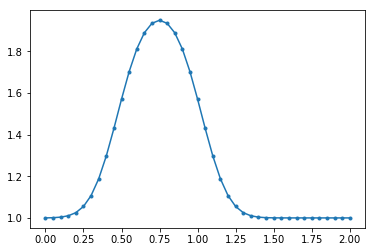

In [3]:
nx = 41
dx = 2/(nx-1)
nt = 20
nu = 0.3
CFL = 0.2
dt = CFL * dx**2 / nu

u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2

un = np.zeros(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu * dt/dx**2 *(un[i+1]-2*un[i]+un[i-1])
        
plt.plot(np.linspace(0,2,nx),u,'.-')